## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from math import *
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Import and combine the data for each years

In [2]:
# Import the excel file
data1 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2013-14")
data1["year"] = "2013"
data2 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2014-15")
data2["year"] = "2014"
data3 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2015-16")
data3["year"] = "2015"
data4 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2016-17")
data4["year"] = "2016"
data5 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2017-18")
data5["year"] = "2017"
data6 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2018-19")
data6["year"] = "2018"
data7 = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2019-20")
data7["year"] = "2019"

/Users/chenshuping/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# Combine the data from each year and create a variable called "year"
combined_data = [data1, data2, data3, data4, data5, data6, data7]
data = pd.concat(combined_data)

## Data Description

In [4]:
# Summary of the data type of each variable
data.dtypes

Event Name                                 object
Activity Code                              object
Activity Description                       object
Location Code                              object
Location Description                       object
Group Code                                 object
Group Description                          object
Event Date                         datetime64[ns]
Participated                                int64
Average Age                                 int64
First Time Attendees                        int64
Percentage First Time Attendees           float64
Major Prospects                             int64
Percentage Major Prospect                 float64
year                                       object
dtype: object

## Exploratory Data Analysis

In [5]:
# Check whether there are any missing values in the data
data.isna().any()

Event Name                         False
Activity Code                      False
Activity Description               False
Location Code                      False
Location Description               False
Group Code                         False
Group Description                  False
Event Date                         False
Participated                       False
Average Age                        False
First Time Attendees               False
Percentage First Time Attendees    False
Major Prospects                    False
Percentage Major Prospect          False
year                               False
dtype: bool

In [6]:
# Summary of categorical variables
data.describe(include="object")

# unique: Number of distinct object in the column
# top: Most frequently occurring object in the column
# freq: Number of times the top appearing object in the column

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,year
count,622,622,622,622,622,622,622,622
unique,428,341,346,45,111,49,88,7
top,Baltimore Terps Game Watch,PEABG,CP AA-Baltimore Terps Game Watch,PDON,CP DMV- On Campus,PS9,CP Social-General,2018
freq,14,14,12,116,52,176,72,219


In [7]:
# Summary of numerical variables
data.describe(include = [np.number])

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,44.803859,40.117363,13.456592,0.276282,5.966238,0.102214
std,93.165049,9.741459,41.103936,0.242273,14.123466,0.131444
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,33.000000,1.000000,0.068523,0.000000,0.000000
50%,20.000000,40.000000,4.000000,0.237327,1.000000,0.058824
75%,44.750000,46.000000,11.000000,0.444444,5.000000,0.166667
max,1657.000000,75.000000,702.000000,1.000000,131.000000,0.818182


<ipython-input-8-3dd710a244c3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(["{:,.0%}".format(x) for x in original_yaxis])


Text(0.5, 1.0, 'Changes in the percentage of first-time attendees to attend our events')

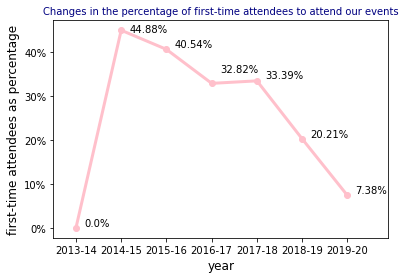

In [8]:
# Changes in the percentage of First Time Attendees to attend our events as year passes
# Find the mean of percentage First Time Attendees for each year
avgft = []
for i in range(len(combined_data)):
    avgft.append(combined_data[i]["Percentage First Time Attendees"].mean())
# x-axis value 
names = ["2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19",  "2019-20"]
# y-axis value
values = avgft
# draw the line
plt.plot(names, values, linewidth=3, color="pink", marker='o')
# change the y-axis value to percentage
original_yaxis = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0%}".format(x) for x in original_yaxis])
# set x limits of the axes
plt.xlim(left= -0.5)
plt.xlim(right= 6.9)
# set the location of x
x_range = []
for i in range(7):
    x_range.append(i + 0.18)
# set the location of y
new_values = [values[0], values[1]-0.01, values[2], values[3]+0.02, values[4], values[5], values[6]]
# add data label to each point
for i in range(7):
    plt.text(x_range[i], new_values[i]+0.005, str(round(values[i]*100, 2))+'%')
# set the label for x-axis
plt.xlabel("year", fontsize=12)
# set the label for y-axis
plt.ylabel("first-time attendees as percentage", fontsize=12)
# Set the title for the plot 
plt.title("Changes in the percentage of first-time attendees to attend our events", fontsize=10, color="navy")

<ipython-input-9-3a6658b7f78c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(["{:,.0%}".format(x) for x in original_yaxis])


Text(0.5, 1.0, 'Changes in the percentage of major gift prospects to attend our events')

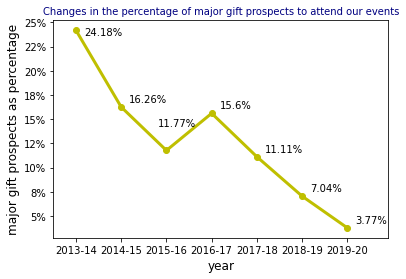

In [9]:
# Changes in the percentage of Major Gift Prospects to attend our events as year passes
# Find the mean of percentage Major Gift Prospects for each year
avgmp = []
for i in range(len(combined_data)):
    avgmp.append(combined_data[i]["Percentage Major Prospect"].mean())
# x-axis value 
names = ["2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19",  "2019-20"]
# y-axis value
values = avgmp
# draw the line
plt.plot(names, values, linewidth=3, color='y', marker="o")
# change the y-axis value to percentage
original_yaxis = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0%}".format(x) for x in original_yaxis])
# set X limits of the axes
plt.xlim(left= -0.5)
plt.xlim(right= 6.9)
# set the location of x
x_range = []
for i in range(7):
    if i==2:
        x_range.append(i - 0.2)
    else:
        x_range.append(i + 0.18)
# set the location of y
new_values = [values[0]-0.01, values[1], values[2]+0.02, values[3], values[4], values[5], values[6]]
# add data label to each point
for i in range(7):
    plt.text(x_range[i], new_values[i]+0.005, str(round(values[i]*100, 2))+'%')
# set the label for x-axis
plt.xlabel("year", fontsize=12)
# set the label for y-axis
plt.ylabel("major gift prospects as percentage", fontsize=12)
# Set the title for the plot 
plt.title("Changes in the percentage of major gift prospects to attend our events", fontsize=10, color="navy")

Text(0.5, 1.0, 'Correlation Plot')

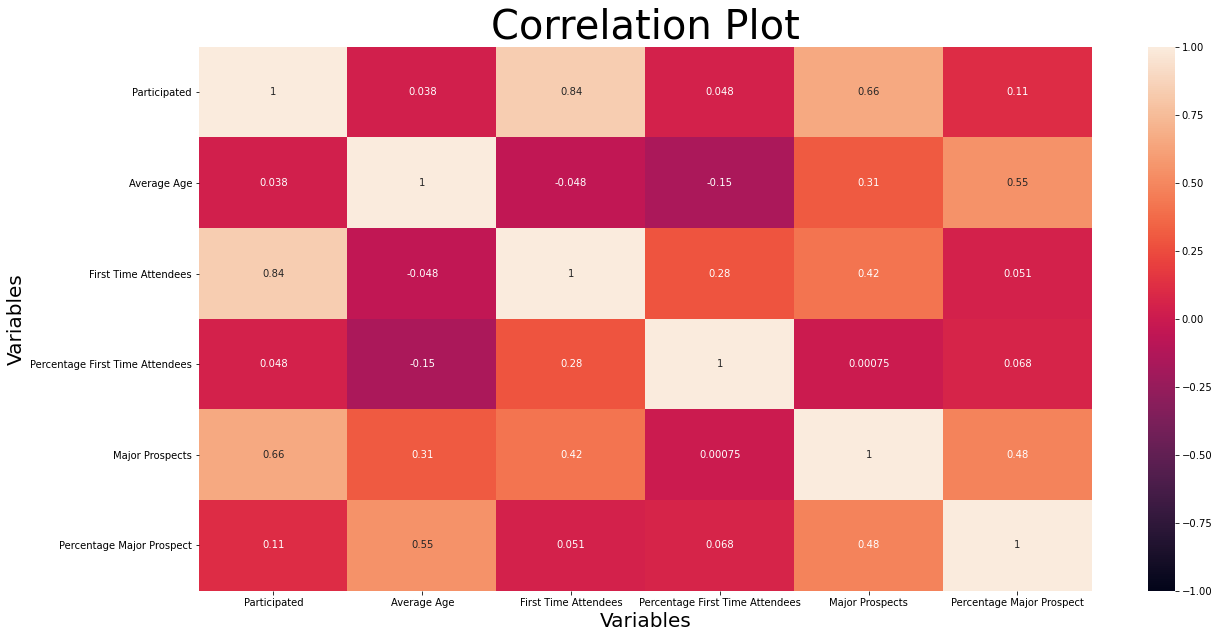

In [10]:
# Correlation Plot
corr = data.corr()
plt.figure(figsize = (20, 10))
corr_plot = sns.heatmap(corr, cbar = True, vmin = -1, vmax = 1, annot = True)
corr_plot
# label axes and figure title.
plt.xlabel("Variables", fontsize = 20)
plt.ylabel("Variables", fontsize = 20)
plt.title("Correlation Plot", fontsize = 40)

## Regression Model: First Time Attendees

In [11]:
# Reg1: dependent variable = First Time Attendees; independent variables = Average Age, Participated
# regression model
y = data["First Time Attendees"]
x = data[["Average Age","Participated"]]
res = LinearRegression().fit(x,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_r = 1 - (1-res.score(x,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r = res.score(x,y,sample_weight=None)
# prediction
yhat = res.predict(x)
# MSE
mse = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse)
print(r)
print(adjusted_r)
print(res.intercept_, res.coef_) 

MSE: 497.200
0.7052434687986018
0.7038126118510222
10.374008491700804 [-0.33656403  0.37016108]


In [12]:
# Turn categorical variables to dummies
df2 = pd.get_dummies(data["Group Code"])
df3 = pd.get_dummies(data["Location Code"])
df4 = pd.get_dummies(data["Activity Code"])

In [13]:
# Reg2: dependent variable = First Time Attendees; independent variables = Average Age, Participated, year, Major Prospects
# regression model
y = data["First Time Attendees"]
x2 = data[["Average Age","Participated","year","Major Prospects"]]
res2 = LinearRegression().fit(x2,y) 
# adjusted R squared value
num_params = len(res2.coef_) + 1
adjusted_r2 = 1 - (1-res2.score(x2,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r2 = res2.score(x2,y,sample_weight=None)
# prediction
yhat = res2.predict(x2)
# MSE
mse2 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse2)
print(r2)
print(adjusted_r2)
print(res2.intercept_, res2.coef_) 

MSE: 438.392
0.7401072907796116
0.7379977720359396
5305.104194076683 [-0.03889869  0.44177711 -2.6306041  -0.78005432]


In [14]:
# Reg3: dependent variable = First Time Attendees; independent variables = Average Age, Participated, Major Prospects
# regression model
y = data["First Time Attendees"]
x3 = data[["Participated","year","Major Prospects"]]
res3 = LinearRegression().fit(x3,y) 
# adjusted R squared value
num_params = len(res3.coef_) + 1
adjusted_r3 = 1 - (1-res3.score(x3,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r3 = res3.score(x3,y,sample_weight=None)
# prediction
yhat = res3.predict(x3)
# MSE
mse3 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse3)
print(r3)
print(adjusted_r3)
print(res3.intercept_, res3.coef_) 

MSE: 438.514
0.7400348337323861
0.7383494841941844
5332.506282094231 [ 0.44300734 -2.64495079 -0.79418131]


In [15]:
# Reg4: dependent variable = First Time Attendees; independent variables = Participated, Major Prospects
# regression model
y = data["First Time Attendees"]
x4 = data[["Participated","Major Prospects"]]
res4 = LinearRegression().fit(x4,y)
# adjusted R squared value
num_params = len(res3.coef_) + 1
adjusted_r4 = 1 - (1-res4.score(x4,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r4 = res4.score(x4,y,sample_weight=None)
# prediction
yhat = res4.predict(x4)
# MSE
mse4 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse4)
print(r4)
print(adjusted_r4)
print(res4.intercept_, res4.coef_) 

MSE: 457.518
0.728768504016005
0.7270101150631104
-2.0719180986296024 [ 0.43565049 -0.6688156 ]


In [16]:
# Reg5: dependent variable = First Time Attendees; independent variables = Average Age, Participated, Group Code, Locaation Code, Activity Code
# regression model
y = data["First Time Attendees"]
x5 = pd.concat((data["Participated"],data["Major Prospects"],data["year"],df2,df3,df4),axis=1)
res5 = LinearRegression().fit(x5,y) 
# adjusted R squared value
num_params = len(res5.coef_) + 1
adjusted_r5 = 1 - (1-res5.score(x5,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r5 = res5.score(x5,y,sample_weight=None)
# prediction
yhat = res5.predict(x5)
# MSE
mse5 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse5)
print(r5)
print(adjusted_r5)
print(res5.intercept_, res5.coef_) 

MSE: 280.975
0.8334290979805801
0.43164543871395733
138983353494.44748 [ 2.62190734e-01  2.04405132e-01 -3.22726083e+00  3.20507982e+11
 -9.41481451e+10  9.83442112e+11 -9.41481451e+10 -5.17095523e+10
 -4.43892180e+10 -2.43422372e+11 -2.43422372e+11 -2.43422372e+11
 -2.43422372e+11  3.92240484e+11  5.04860123e+10  1.91435429e+11
  1.64492204e+11 -1.96968543e+10 -1.23270443e+11 -7.67696861e+10
  4.75583021e+10 -1.44749312e+11 -1.32846751e+11 -1.81408779e+11
 -3.58439921e+10 -6.56413724e+10  9.42724358e+10 -9.98849926e+10
  1.72346953e+11 -6.72398576e+10  4.69894734e+10 -2.61853690e+10
 -7.12398911e+10  1.79291839e+11 -9.23496577e+10  9.83695263e+10
 -7.27389647e+10  5.00645130e+10 -4.93790925e+10 -1.28365876e+11
 -4.26054103e+10  7.79314466e+10 -8.60904569e+10 -1.36871194e+10
 -7.34613851e+10 -2.71240734e+10 -2.43361537e+10  2.60718831e+10
  3.94685118e+10 -1.25054411e+11 -1.32846751e+11 -9.59936859e+10
 -3.71737667e+10 -2.37890745e+10 -8.66876363e+10 -5.84812672e+10
 -2.98236203e+10 -6

In [17]:
# Reg6: dependent variable = First Time Attendees; independent variables = Participated, Major Prospects, year, Location Code, Activity Code 
# regression model
y = data["First Time Attendees"]
x6 = pd.concat((data["Participated"],data["Major Prospects"],data["year"],df3,df4),axis=1)
res6 = LinearRegression().fit(x6,y) 
# adjusted R squared value
num_params = len(res6.coef_) + 1
adjusted_r6 = 1 - (1-res6.score(x6,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r6 = res6.score(x6,y,sample_weight=None)
# prediction
yhat = res6.predict(x6)
# MSE
mse6 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse6)
print(r6)
print(adjusted_r6)
print(res6.intercept_, res6.coef_) 

MSE: 281.268
0.8332551049458576
0.5517377496596432
6386.8121199625075 [ 2.61890974e-01  2.08681991e-01 -3.16609057e+00 -4.63313293e+00
 -1.03030897e+01 -3.68808630e+00 -4.33060372e-01 -1.65188375e+00
 -1.78908077e+00  1.36519039e+00 -2.17051940e-01 -1.79579976e+00
  1.21113184e+00 -4.11296898e+00  2.57760796e+00  2.22193389e+00
 -4.04051264e-01 -5.70532375e-01  2.65587721e+00  1.54871367e+00
  1.14773391e+00 -1.08197052e+00  9.20254420e-01  6.55540903e-01
 -4.71646476e-01 -2.17692090e+00 -2.94158872e+00 -1.49749212e+00
  5.58453137e+00  1.86152198e+01 -2.62358139e+00  1.95343705e+01
 -2.01239259e-01 -2.01218452e+00  3.06813517e+00 -7.83906509e+00
 -6.92608360e-02 -5.67381769e+00 -5.85310575e+00 -8.46684359e-01
  1.52486657e+00 -2.09141664e+00  4.29546506e+00 -4.69423189e-01
  7.52156494e-01  1.12885556e+00 -6.29445354e+00  2.93500442e+00
 -6.33025733e+00  7.66701807e-02  2.86838947e+00  3.43984646e-01
  2.32248558e+00 -2.32359709e+01  5.12920655e+00 -1.21254387e+01
 -1.72681037e+01 -2.

In [18]:
# Reg7: dependent variable = First Time Attendees; independent variables = Participated, Major Prospects, year, Activity Code
# regression model
y = data["First Time Attendees"]
x7 = pd.concat((data["Participated"],data["Major Prospects"],data["year"],df4),axis=1)
res7 = LinearRegression().fit(x7,y) 
# adjusted R squared value
num_params = len(res7.coef_) + 1
adjusted_r7 = 1 - (1-res7.score(x7,y))*(len(y)-1)/(len(y)-num_params-1)
# R squared value
r7 = res7.score(x7,y,sample_weight=None)
# prediciton
yhat = res7.predict(x7)
# MSE
mse7 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse7)
print(r7)
print(adjusted_r7)
print(res7.intercept_, res7.coef_) 

MSE: 281.304
0.833234027189377
0.6247765611760983
-64943855226.47517 [ 2.61991053e-01  2.04315337e-01 -3.17315307e+00  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.49438616e+10  6.49438616e+10  6.49438616e+10
  6.49438616e+10  6.4

Text(0, 0.5, 'Adjusted R2 Score')

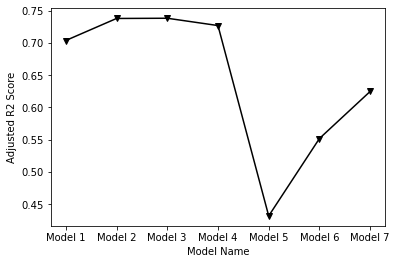

In [19]:
# Comparsion plot of adjusted R squared values with 7 models
x_values = ["Model 1","Model 2","Model 3","Model 4","Model 5","Model 6","Model 7"]
y_values = [adjusted_r,adjusted_r2,adjusted_r3,adjusted_r4,adjusted_r5,adjusted_r6,adjusted_r7]
plt.plot(x_values,y_values,'kv-')
plt.xlabel("Model Name")
plt.ylabel("Adjusted R2 Score")

Text(0, 0.5, 'Mean Squared Error')

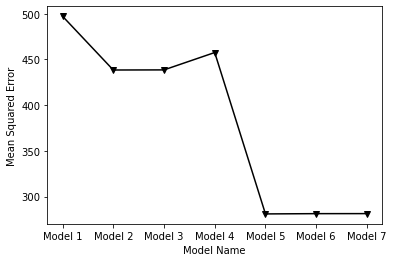

In [20]:
# Comparsion plot of adjusted MSE with 7 models
x1_values = ["Model 1","Model 2","Model 3","Model 4","Model 5","Model 6","Model 7"]
y1_values = [mse, mse2, mse3, mse4, mse5, mse6, mse7]
plt.plot(x1_values,y1_values,'kv-')
plt.xlabel("Model Name")
plt.ylabel("Mean Squared Error")

## Regresssion Model: Major Prospects

In [21]:
# Reg1: dependent variable = Major Prospects; independent variables = Average Age, Participated, year, First Time Attendees
# regression model
y = data["Major Prospects"]
x = data[["Average Age","Participated","year","First Time Attendees"]]  
res = LinearRegression().fit(x,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm = 1 - (1-res.score(x,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(x)
# MSE
mse_1 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_1)
print(res.score(x,y,sample_weight=None))
print(adjusted_rm)
print(res.intercept_, res.coef_)

MSE: 78.596
0.6053448864819214
0.602141517054015
3757.7547607089027 [ 0.34793641  0.14645916 -1.86957154 -0.13985057]


In [22]:
# Reg2: dependent variables = Major prospects, independent variables = Participated, year, First time Attendees, AverageAge, Group Code
# regression model
y = data["Major Prospects"]
xm=pd.concat((data["Participated"],data["year"],data["First Time Attendees"],data["Average Age"],df2),axis=1)
res = LinearRegression().fit(xm,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm2 = 1 - (1-res.score(xm,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(xm)
# MSE
mse_2 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_2)
print(res.score(xm,y,sample_weight=None))
print(adjusted_rm2)
print(res.intercept_, res.coef_)

MSE: 67.072
0.6632129228882543
0.631137963163326
3694.2439406457597 [ 0.13515513 -1.83713772 -0.10959331  0.29558369  0.80112024  0.90501683
 -1.93823987 -5.33793524  2.91972992  0.74548103 -6.80333447  0.1086277
  0.85968337 -1.42055702  3.10901921  4.20992713 -1.72105193 -0.93491682
 -0.66859425 -2.03041487 23.71635133  2.77334049 -0.85378407  5.30189691
 10.969656   -3.5856542  -0.98668416 -2.25924459 -1.52898116 -0.57141389
  0.09700956  3.66628699  3.86639221 -0.78584726  0.48542108  0.49809705
 -3.67691869 -3.66836453  1.33286653 -4.92274258  1.16999002 -2.76269315
 -8.03195725 -1.90729675 -6.19093722  2.1146585  -0.46954017 -3.50057267
 -2.40245016  2.16412166 -3.79424914  3.92322011 -2.98353778]


In [23]:
# Reg3: dependent variables = Major prospects, independent variables = participated, year, First time Attendees, Average Age, Group Code, Location Code.
# regression model
y = data["Major Prospects"]
xm2=pd.concat((data["Participated"],data["year"],data["First Time Attendees"],data["Average Age"],df2,df3),axis=1)
res = LinearRegression().fit(xm2,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm3 = 1 - (1-res.score(xm2,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(xm2)
# MSE
mse_3 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_3)
print(res.score(xm2,y,sample_weight=None))
print(adjusted_rm3)
print(res.intercept_, res.coef_)

MSE: 59.965
0.6988981317853225
0.6417926050549525
-17619066122.52527 [ 1.28862226e-01 -1.86845660e+00 -1.01307990e-01  4.24208873e-01
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10 -4.70444485e+10
 -4.70444485e+10  6.46635184e+10  6.46635184e+10  6.46635184e+10
  6.46635184e+10  6.4

In [24]:
# Reg4: dependent variables = Major prospects, independent variables = participated, year, First time Attendees, Average Age, Group Code, Location Code, Activity Code
# regression model
y = data["Major Prospects"]
xm3=pd.concat((data["Participated"],data["year"],data["First Time Attendees"],data["Average Age"],df2,df3,df4),axis=1)
res = LinearRegression().fit(xm3,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm4 = 1 - (1-res.score(xm3,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(xm3)
# MSE
mse_4 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_4)
print(res.score(xm3,y,sample_weight=None))
print(adjusted_rm4)
print(res.intercept_, res.coef_)

MSE: 13.577
0.9318246874201794
0.7660946457896765
3063.7973056191054 [ 5.46247301e-02 -1.52280907e+00  8.97546009e-03  2.37407165e-01
 -2.24035715e+00  3.61475319e+00 -2.00003209e+00  7.75302441e+00
 -1.86017266e-01 -7.63806275e-01 -3.46937703e+00  2.21420875e+00
  5.51707071e-01 -2.16826365e-01  1.00666407e+00  4.07284125e-01
  1.69513583e-01 -2.43798326e-01  2.82185915e+00 -1.40619533e+00
  1.85578129e+01  5.53796818e+00 -2.74867481e+00  1.63702295e+00
  6.65484087e+00  2.13155223e+00 -1.70762917e+00 -1.25459148e+00
 -8.71493772e-01 -1.18687990e+00 -5.11776110e-01  1.62391696e-02
  1.12518919e+00 -5.02917793e-01 -1.17186291e+00  3.86214254e-01
 -1.35302505e+00 -3.05908548e+00  5.58356938e-02 -4.82507549e+00
  5.75397550e-01 -2.88907717e+00 -7.14760400e+00 -4.08231831e-01
 -2.82232024e+00  4.97547103e-02 -1.34806025e+00 -5.70053862e+00
 -3.22692405e+00 -7.61201639e-01 -6.98586784e-01  4.46611400e-01
 -9.91487132e-01 -1.52268084e+00 -1.29873023e+00  1.83556496e+00
 -2.01826609e+00  1.8

In [25]:
# Reg5: dependent variables = Major prospects, independent variables = participated, year, Average Age
# regression model
y = data["Major Prospects"]
xm4=pd.concat((data["Participated"],data["year"],data["Average Age"]),axis=1)  
res = LinearRegression().fit(xm4,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm5 = 1 - (1-res.score(xm4,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(xm4)
# MSE
mse_5 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_5)
print(res.score(xm4,y,sample_weight=None))
print(adjusted_rm5)
print(res.intercept_, res.coef_)

MSE: 88.220
0.5570197053644719
0.5541478720118915
3385.119084817902 [ 0.09504493 -1.6855595   0.39664706]


In [26]:
# Reg6: dependent variables = Major prospects, independent variables = Participated, First time Attendees, Average Age
# regression model
y = data["Major Prospects"]
xm5=pd.concat((data["Participated"],data["First Time Attendees"],data["Average Age"]),axis=1)  
res = LinearRegression().fit(xm5,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm6 = 1 - (1-res.score(xm5,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(xm5)
# MSE
mse_6 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_6)
print(res.score(xm5,y,sample_weight=None))
print(adjusted_rm6)
print(res.intercept_, res.coef_)

MSE: 88.843
0.5538929968053217
0.5510008930568959
-13.654063644882251 [ 0.1446209  -0.12519522  0.3695514 ]


In [27]:
# Reg7: dependent variables = Major prospects, independent variables = participated, First time Attendees, year
# regression model
y = data["Major Prospects"]
xm6=pd.concat((data["Participated"],data["First Time Attendees"],data["year"]),axis=1)  
res = LinearRegression().fit(xm6,y)
# adjusted R squared value
num_params = len(res.coef_) + 1
adjusted_rm7 = 1 - (1-res.score(xm6,y))*(len(y)-1)/(len(y)-num_params-1)
# prediction
yhat = res.predict(xm6)
# MSE
mse_7 = mean_squared_error(y, yhat)
print("MSE: %.3f" % mse_7)
print(res.score(xm6,y,sample_weight=None))
print(adjusted_rm7)
print(res.intercept_, res.coef_)

MSE: 89.761
0.5492841681583205
0.5463621854559433
4026.8062626190454 [ 0.15595783 -0.16256351 -1.99611934]


Text(0, 0.5, 'Adjusted R2 Score')

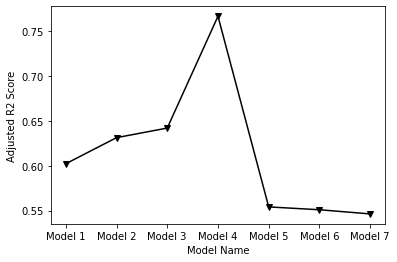

In [28]:
# Comparsion plot of adjusted R squared values with 7 models
x3_values = ["Model 1","Model 2","Model 3","Model 4","Model 5","Model 6","Model 7"]
y3_values = [adjusted_rm,adjusted_rm2,adjusted_rm3,adjusted_rm4,adjusted_rm5,adjusted_rm6,adjusted_rm7]
plt.plot(x3_values,y3_values,'kv-')
plt.xlabel("Model Name")
plt.ylabel("Adjusted R2 Score")

Text(0, 0.5, 'Mean Squared Error')

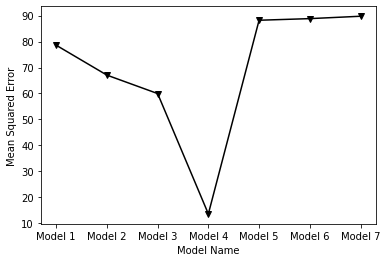

In [29]:
# Comparsion plot of adjusted R squared values with 7 models
x4_values = ["Model 1","Model 2","Model 3","Model 4","Model 5","Model 6","Model 7"]
y4_values = [mse_1, mse_2, mse_3, mse_4, mse_5, mse_6, mse_7]
plt.plot(x4_values,y4_values,'kv-')
plt.xlabel("Model Name")
plt.ylabel("Mean Squared Error")

## Attraction of Group: First Time Attendees

In [30]:
# Get the order of average of First Time Attendees grouped by each Group Code
avgft = data[["Group Code","First Time Attendees"]].groupby(["Group Code"]).mean().sort_values(by="First Time Attendees",ascending=False)
avgft.head(5)

,First Time Attendees
Group Code,
PSS,106.142857
PM9,37.333333
PI9,29.200000
PVW,27.000000
PAB,27.000000


In [31]:
# Find the Group Description of the top 1 Group Code
data.loc[data["Group Code"]=="PSS"][["Group Code", "Group Description"]]

,Group Code,Group Description
11,PSS,CP Social- Students
89,PSS,CP Social- Students
66,PSS,CP Social- Students
67,PSS,CP Social- Students
27,PSS,CP Social- Students
28,PSS,CP Social- Students
18,PSS,CP Social- Students
81,PSS,CP Social- Students
82,PSS,CP Social- Students
84,PSS,CP Social- Students


## Attraction of Location: First Time Attendees

In [32]:
# Get the order of average of First Time Attendees grouped by each Location Code
avgft = data[["Location Code","First Time Attendees"]].groupby(["Location Code"]).mean().sort_values(by="First Time Attendees",ascending=False)
avgft.head(5)

,First Time Attendees
Location Code,
PSAU,70.000000
PDON,31.525862
PNNA,26.250000
POWE,24.756098
POBR,18.000000


In [33]:
# Find the Location Description of the top 1 Location Code
data.loc[data["Location Code"]=="PSAU"][["Location Code", "Location Description"]]

,Location Code,Location Description
3,PSAU,CP Southeast- Austin
52,PSAU,CP Southeast- Austin


## Attraction of Events: First Time Attendees

In [34]:
# Get the order of average of First Time Attendees grouped by each Activity Code
avgft = data[["Activity Code","First Time Attendees"]].groupby(["Activity Code"]).mean().sort_values(by="First Time Attendees",ascending=False)
avgft

,First Time Attendees
Activity Code,
PEAVB,702.00
PEZGB,221.25
PEZHA,139.00
PESFF,138.00
PESTH,121.00
...,...
PEAS7,0.00
PEAS2,0.00
PEZLA,0.00


In [35]:
# Find the Activity Description of the top 5 Activity Code
print(data.loc[data["Activity Code"]=="PEAVB"][["Activity Code", "Activity Description"]])
print(data.loc[data["Activity Code"]=="PEZAG"][["Activity Code", "Activity Description"]])
print(data.loc[data["Activity Code"]=="PEZHF"][["Activity Code", "Activity Description"]])
print(data.loc[data["Activity Code"]=="PEZJV"][["Activity Code", "Activity Description"]])
print(data.loc[data["Activity Code"]=="PEZHC"][["Activity Code", "Activity Description"]])

  Activity Code     Activity Description
0         PEAVB  CP AA-Virtual Book Club
    Activity Code Activity Description
1           PEZAG   CP AAE-Awards Gala
3           PEZAG   CP AAE-Awards Gala
193         PEZAG   CP AAE-Awards Gala
   Activity Code          Activity Description
90         PEZHF  CP AAE-Hall of Fame Ceremony
   Activity Code                Activity Description
26         PEZJV  CP AAE-Jimmy V Classic Bball Event
   Activity Code        Activity Description
14         PEZHC  CP AAE-Homecoming Tailgate
18         PEZHC  CP AAE-Homecoming Tailgate
4          PEZHC  CP AAE-Homecoming Tailgate
10         PEZHC  CP AAE-Homecoming Tailgate


In [36]:
# Get the order of average of percentage of First Time Attendees grouped by each Activity Code
avgpft = data[["Activity Code","Percentage First Time Attendees"]].groupby(["Activity Code"]).agg(Avg_Pct_1st_Attendees =("Percentage First Time Attendees","mean")).sort_values(by="Avg_Pct_1st_Attendees",ascending=False)
avgpft

,Avg_Pct_1st_Attendees
Activity Code,
PEAEH,1.000000
PEARO,1.000000
PEAYB,0.888889
PEAHS,0.875000
PEASK,0.864198
...,...
PEAAE,0.000000
PEAUD,0.000000
PEAAA,0.000000


In [37]:
# Find the position of the average of percentage of First Time Attendees for the Activity Code with highest First Time Attendees
avgpft_position = 0
for i in range(len(avgpft)):
    avgpft_position += 1
    if avgpft.index.tolist()[i] == avgft.index.tolist()[0]:
        print(avgpft.index.tolist()[i], avgpft_position)

PEAVB 91


## Attraction of Group: Major Prospects

In [38]:
# Get the order of average of Major Prospects grouped by each Group Code
avgft = data[["Group Code","Major Prospects"]].groupby(["Group Code"]).mean().sort_values(by="Major Prospects",ascending=False)
avgft.head(5)

,Major Prospects
Group Code,
PH9,44.666667
PM9,28.333333
PHM,19.250000
PS3,18.000000
PMM,17.000000


In [39]:
# Find the Group Description of the top 1 Group Code
data.loc[data["Group Code"]=="PH9"][["Group Code", "Group Description"]]

,Group Code,Group Description
1,PH9,CP Stewardship- General
90,PH9,CP Stewardship- General
3,PH9,CP Stewardship- General
31,PH9,CP Stewardship- General
22,PH9,CP Stewardship- General
25,PH9,CP Stewardship- General
95,PH9,CP Stewarship- General
193,PH9,CP Stewardship-General
200,PH9,CP Stewardship-General


## Attraction of Location: Major Prospects

In [40]:
# Get the order of average of Major Prospects grouped by each Location Code
avgft = data[["Location Code","Major Prospects"]].groupby(["Location Code"]).mean().sort_values(by="Major Prospects",ascending=False)
avgft.head(5)

,Major Prospects
Location Code,
PNNA,26.000000
PSAU,25.500000
PNNY,14.027027
PDON,13.267241
PSNA,11.000000


In [41]:
# Find the Location Description of the top 1 Location Code
data.loc[data["Location Code"]=="PNNA"][["Location Code", "Location Description"]]

,Location Code,Location Description
23,PNNA,CP Northeast- General
46,PNNA,CP Northeast- General
55,PNNA,CP Northeast- General
167,PNNA,CP Northeast-General


## Attraction of Activity: Major Prospects

In [42]:
# Get the order of average of Major Prospects grouped by each Activity Code
avgmp = data[["Activity Code","Major Prospects"]].groupby(["Activity Code"]).mean().sort_values(by="Major Prospects",ascending=False)
avgmp

,Major Prospects
Activity Code,
PEAVB,97.00
PEZAG,94.00
PEZHF,80.00
PEZJV,76.00
PEZHC,69.25
...,...
PEAKB,0.00
PEAKH,0.00
PEAKM,0.00


In [43]:
# Find the Activity Description of the top 1 Activity Code
data.loc[data["Activity Code"]=="PEAVB"][["Activity Code", "Activity Description"]]

,Activity Code,Activity Description
0,PEAVB,CP AA-Virtual Book Club


In [44]:
# Get the order of average of percentage of Major Prospects grouped by each Activity Code
avgpmp = data[["Activity Code","Percentage Major Prospect"]].groupby(["Activity Code"]).agg(Avg_Pct_Major_Prospect =("Percentage Major Prospect","mean")).sort_values(by="Avg_Pct_Major_Prospect",ascending=False)
avgpmp

,Avg_Pct_Major_Prospect
Activity Code,
PEZAT,0.590909
PEACA,0.554241
PEATE,0.545455
PEZHF,0.484848
PE788,0.450534
...,...
PEARC,0.000000
PEARD,0.000000
PEAED,0.000000


In [45]:
# Find the position of the average of percentage of Major Prospects for the Activity Code with highest Major Prospects
avgpmp_position = 0
for i in range(len(avgpmp)):
    avgpmp_position += 1
    if avgpmp.index.tolist()[i] == avgmp.index.tolist()[0]:
        print(avgpmp.index.tolist()[i], avgpmp_position)

PEAVB 178
